In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model, metrics

In [83]:
data = "http://lib.stat.cmu.edu/datasets/boston"
boston = pd.read_csv(data_url, sep="\s+", skiprows=22)

In [84]:
boston.head(50)

,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30
0,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
2,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
4,392.83000,4.03,34.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.03237,0.00,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7
6,394.63000,2.94,33.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.06905,0.00,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7
8,396.90000,5.33,36.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.02985,0.00,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7


In [85]:
boston.shape

(1011, 11)

In [86]:
boston1 = boston.dropna()

In [87]:
boston1.shape
boston1.head(100)

,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
5,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7
7,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7
9,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7
...,...,...,...,...,...,...,...,...,...,...,...
191,0.11504,0.0,2.89,0.0,0.445,6.163,69.6,3.4952,2.0,276.0,18.0
193,0.12083,0.0,2.89,0.0,0.445,8.069,76.0,3.4952,2.0,276.0,18.0
195,0.08187,0.0,2.89,0.0,0.445,7.820,36.9,3.4952,2.0,276.0,18.0
197,0.06860,0.0,2.89,0.0,0.445,7.416,62.5,3.4952,2.0,276.0,18.0


In [88]:
boston2 = boston1.drop(boston.columns[1],axis = 1)

In [89]:
boston2.head()

,0.00632,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30
1,0.02731,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,0.02729,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
5,0.03237,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7
7,0.06905,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7
9,0.02985,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7


In [90]:
boston3 = boston2.drop(boston.columns[3],axis = 1)

In [91]:
boston3.head()

,0.00632,2.310,0.5380,6.5750,65.20,4.0900,1,296.0,15.30
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,0.02729,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
5,0.03237,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7
7,0.06905,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7
9,0.02985,2.18,0.458,6.430,58.7,6.0622,3.0,222.0,18.7


In [92]:
array = boston3.values

In [93]:
X = array[:,:-1]
y = array[:,-1:]

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=1)

Coefficients: 
 [[-7.30104684e-02  1.54444543e-01 -1.30459802e+01 -1.12710900e+00
   1.90987634e-02  8.67581941e-02  1.68289792e-01 -4.63424663e-04]]
Variance score: 0.19485905046580398


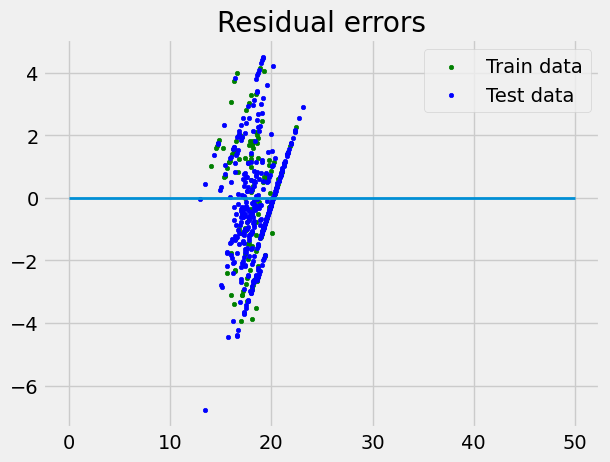

In [95]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Variance score: {}'.format(reg.score(X_test, y_test)))
plt.style.use('fivethirtyeight')
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
      color = "green", s = 10, label = 'Train data')
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
      color = "blue", s = 10, label = 'Test data')
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()